# Inferring subsurface porosity from seismic trace data with uncertainty evaluation using ensemble deep learning

## Importing Required Libraries

In [1]:
##########################################################################################################################
import tensorflow_addons as tfa
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.utils import normalize
from keras.callbacks import EarlyStopping
from keras.models import Sequential,load_model
##########################################################################################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange,absolute,mean,std
##########################################################################################################################

## 0. Data Preparation
### 0.1 Importing Data

In [2]:
Seismic = np.load('Data/SeismicTrace.npy')
print('Sahpe of seismic trace data:',Seismic.shape)
##########################################################################################################################
Porosity = np.load('Data/PorosityTrace.npy')
print('Sahpe of porosity trace data:',Porosity.shape)
##########################################################################################################################

Sahpe of seismic trace data: (78, 40401)
Sahpe of porosity trace data: (78, 40401)


## 0. Data Preparation
### 0.2 Data Cleaning and Storing into DataFrames

In [3]:
SeisData=Seismic.T
PorData=Porosity.T
##########################################################################################################################
SeiSamples = pd.DataFrame(SeisData)
SPorSamples = pd.DataFrame(PorData)
##########################################################################################################################
Seisdf=SeiSamples.drop([0, 1], axis=1)
print('Clean seismic trace sample:',Seisdf.shape)
##########################################################################################################################
Pordf=SPorSamples.drop([0, 1], axis=1)
print('Clean porosity trace sample:', Pordf.shape)
##########################################################################################################################

Clean seismic trace sample: (40401, 76)
Clean porosity trace sample: (40401, 76)


## 0. Data Preparation
### 0.3 Selecting Random Samples for Visualization
### 1.3.1 Seismic traces

In [4]:
PlotSeiTrace = Seisdf.sample(frac=0.00035, random_state=50).T
TWT = np.arange(624, 924, 3.99)
PlotSeiTrace['DEPTH']=TWT
SeiTrace = PlotSeiTrace.values
SeiTrace=np.flip(SeiTrace)
print('Selected seismic traces',SeiTrace.shape)
PlotSeiTrace

Selected seismic traces (76, 15)


35382   11522   19058   39935   39843   19008   34544   23018    6760  \
2   8574.0  2992.0  -311.0  3823.0  7441.0  8116.0 -2947.0 -3025.0 -4386.0   
3   4756.0  -910.0 -4751.0  1053.0  1464.0  1887.0 -1748.0 -5643.0  2573.0   
4  -4732.0 -3100.0 -1920.0 -4998.0 -3888.0 -5811.0  5149.0  2140.0  5492.0   
5  -2548.0 -3587.0  3757.0  2100.0    22.0 -2440.0  2281.0  6766.0  1759.0   
6   2737.0  -901.0  3798.0  7283.0  1880.0  5065.0 -5895.0  -386.0 -2766.0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
73  -801.0  2179.0  -364.0  1497.0   415.0  3315.0 -1489.0  2714.0 -3151.0   
74 -3614.0   496.0   144.0    79.0   227.0  1039.0  1081.0  3276.0   -58.0   
75  -791.0  -970.0   415.0 -1937.0 -1068.0 -1597.0  1513.0  -764.0  2348.0   
76  3131.0 -2096.0  -444.0   363.0  1001.0 -2985.0 -1711.0 -1838.0   268.0   
77  1897.0 -2237.0 -1921.0  1413.0   688.0 -1750.0 -1969.0 -1489.0  -340.0   

     34985   33466   39421   10219   38798   DEPTH  
2   8552.0 -4555.0  7478.0  3626.0  5079.0  624.00  
3   1946.0  -173.0  5000.0  1189.0  9288.0  627.99  
4  -4908.0  1537.0 -4265.0 -4603.0  -107.0  631.98  
5  -1047.0 -3049.0 -2861.0 -3659.0 -5674.0  635.97  
6   1791.0 -3507.0  2303.0  3798.0   644.0  639.96  
..     ...     ...     ...     ...     ...     ...  
73 -3893.0   480.0 -1952.0  -954.0   241.0  907.29  
74 -1158.0  -993.0    14.0  -932.0  2115.0  911.28  
75  2456.0  -103.0  3394.0   214.0  -773.0  915.27  
76  1064.0 -1146.0  -502.0   265.0 -2894.0  919.26  
77 -1415.0 -1289.0 -4224.0  1014.0   434.0  923.25  

[76 rows x 15 columns]

Visualization


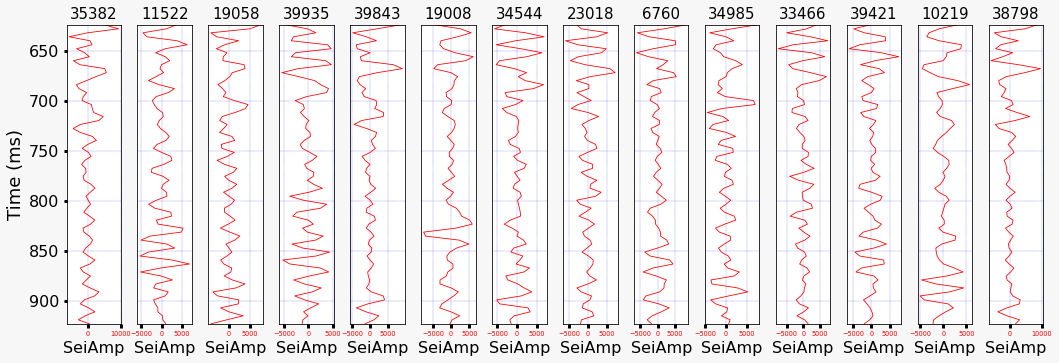

In [5]:
print('Visualization')
rows, cols = 1,14
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(17.5, 5.5), facecolor=(0.97, 0.97, 0.97))
mnemonics = ['35382','11522','19058','39935','39843','19008','34544','23018','6760','34985','33466','39421','10219'
             ,'38798']
Xlab = ['SeiAmp','SeiAmp','SeiAmp','SeiAmp','SeiAmp','SeiAmp','SeiAmp','SeiAmp','SeiAmp','SeiAmp','SeiAmp','SeiAmp',
        'SeiAmp','SeiAmp']
##########################################################################################################################
for i in range(cols):
    if i < cols-0:
        ax[0].set_ylabel("Time (ms)",fontsize=18)
        ax[i].plot(SeiTrace[:,i+1], SeiTrace[:,0],linewidth='0.8', color='r')
        ax[i].set_ylim(max(SeiTrace[:, 0]), min(SeiTrace[:, 0]))
        ax[i].grid(which='major', linestyle=':', linewidth='0.4', color='b')
        ax[i].tick_params(axis='y' ,width=3 ,labelsize=16 ,right=False,left=False)# , labelrotation=90)
        ax[i].tick_params(axis='x',width=3 , labelsize=6.5, labelbottom=True, labeltop=False,bottom=True, top=False,
                          labelcolor='r')
        ax[i].label_outer()
        ax[i].set_facecolor('1')
        ax[i].set_title('%s' %mnemonics[i], fontsize=15)
        ax[i].set_xlabel('%s' %Xlab[i],fontsize=16)#,backgroundcolor='k',color='gold')
        
ax[0].tick_params(axis='y' ,width=3 ,labelsize=16 ,left=True)
plt.subplots_adjust(wspace=0.3)
plt.show()

## 0. Data Preparation
### 0.3 Selecting Random Samples for Visualization
### 1.3.1 Porosity traces

In [6]:
PlotPorTrace = Pordf.sample(frac=0.00035, random_state=50).T
TWT = np.arange(624, 924, 3.99)
PlotPorTrace['DEPTH']=TWT
PorTrace = PlotPorTrace.values
PorTrace=np.flip(PorTrace)
print('Corresponding porosity traces', PorTrace.shape)
PlotPorTrace

Corresponding porosity traces (76, 15)


35382     11522     19058     39935     39843     19008     34544  \
2   0.345155  0.325568  0.326940  0.327354  0.343616  0.315836  0.333726   
3   0.359547  0.322852  0.323333  0.329733  0.355598  0.323698  0.333137   
4   0.359557  0.318468  0.314830  0.331149  0.352764  0.325895  0.327539   
5   0.347653  0.309517  0.309967  0.328054  0.342297  0.318902  0.329349   
6   0.333169  0.306630  0.313245  0.326641  0.331377  0.313798  0.326518   
..       ...       ...       ...       ...       ...       ...       ...   
73  0.321327  0.285459  0.275722  0.282470  0.302200  0.303494  0.280023   
74  0.317405  0.289897  0.275840  0.282338  0.304401  0.305035  0.278784   
75  0.313948  0.286041  0.275593  0.282719  0.304468  0.302866  0.279423   
76  0.312928  0.276411  0.275630  0.278572  0.303683  0.291056  0.283644   
77  0.317819  0.269632  0.276925  0.276023  0.301358  0.281386  0.284460   

       23018      6760     34985     33466     39421     10219     38798  \
2   0.321434  0.306925  0.359554  0.346728  0.345821  0.310904  0.340634   
3   0.317476  0.305114  0.367620  0.331540  0.356529  0.313537  0.350614   
4   0.312887  0.312272  0.364663  0.324005  0.357310  0.310862  0.361868   
5   0.316125  0.321836  0.348404  0.325378  0.347344  0.307568  0.354775   
6   0.326065  0.319038  0.334730  0.321387  0.333890  0.307841  0.342183   
..       ...       ...       ...       ...       ...       ...       ...   
73  0.300612  0.274951  0.313148  0.309131  0.313892  0.273291  0.306342   
74  0.303052  0.272470  0.307396  0.307643  0.314644  0.271943  0.306687   
75  0.306703  0.275609  0.306566  0.303264  0.313103  0.275382  0.308454   
76  0.300526  0.281199  0.312176  0.294676  0.312530  0.278872  0.307347   
77  0.288961  0.284025  0.314450  0.290000  0.308748  0.283231  0.304114   

     DEPTH  
2   624.00  
3   627.99  
4   631.98  
5   635.97  
6   639.96  
..     ...  
73  907.29  
74  911.28  
75  915.27  
76  919.26  
77  923.25  

[76 rows x 15 columns]

Visualization


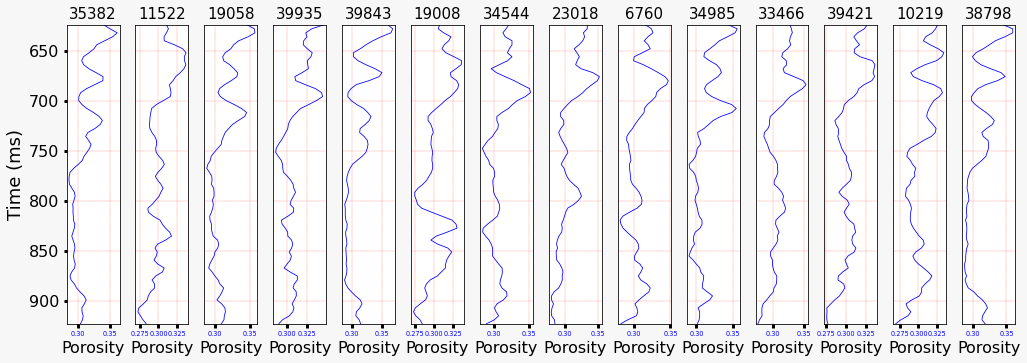

In [7]:
print('Visualization')
rows, cols = 1,14
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(17, 5.5), facecolor=(0.97, 0.97, 0.97))
mnemonics = ['35382','11522','19058','39935','39843','19008','34544','23018','6760','34985','33466','39421','10219'
             ,'38798']
Xlab = ['Porosity','Porosity','Porosity','Porosity','Porosity','Porosity','Porosity','Porosity','Porosity','Porosity',
        'Porosity','Porosity','Porosity','Porosity']
##########################################################################################################################
for i in range(cols):
    if i < cols-0:
        ax[0].set_ylabel("Time (ms)",fontsize=18)
        ax[i].plot(PorTrace[:,i+1], PorTrace[:,0],linewidth='0.8', color='b')
        ax[i].set_ylim(max(PorTrace[:, 0]), min(PorTrace[:, 0]))
        ax[i].grid(which='major', linestyle=':', linewidth='0.4', color='r')
        ax[i].tick_params(axis='y' ,width=3 ,labelsize=16 ,right=False,left=False)# , labelrotation=90)
        ax[i].tick_params(axis='x',width=3 , labelsize=6.5, labelbottom=True, labeltop=False,bottom=True, top=False,
                          labelcolor='b')
        ax[i].label_outer()
        ax[i].set_title('%s' %mnemonics[i], fontsize=15)
        ax[i].set_xlabel('%s' %Xlab[i],fontsize=16)#,backgroundcolor='k',color='gold')
        
ax[0].tick_params(axis='y' ,width=3 ,labelsize=16 ,left=True)
plt.subplots_adjust(wspace=0.3)
plt.show()

## 0. Data Preparation
### 0.3 Selecting Random Samples for Visualization
### 1.3.3 Seismic vs Porosity (Pearson Method) 

In [8]:
print('Correlation Coefficents')
CorData=pd.DataFrame()
CorData['Seismic']=Seisdf.sample(frac=0.00035, random_state=50).T.to_numpy().reshape(-1)
CorData['Porosity']=Pordf.sample(frac=0.00035, random_state=50).T.to_numpy().reshape(-1)
CorData.corr(method='pearson')

Correlation Coefficents


Seismic  Porosity
Seismic   1.000000  0.114078
Porosity  0.114078  1.000000

Visualization


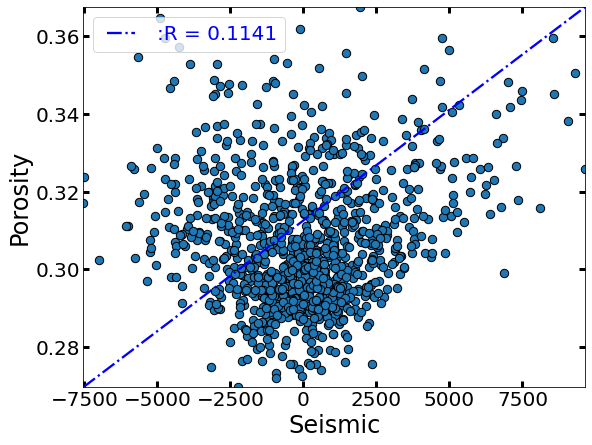

In [9]:
print('Visualization')
plt.figure( figsize=(9,7))
plt.scatter(CorData['Seismic'],CorData['Porosity'],s=70,alpha=1,edgecolors='k')
plt.plot([CorData['Seismic'].min(), CorData['Seismic'].max()],[CorData['Porosity'].min(), CorData['Porosity'].max()],'-.',
         linewidth=2.3 ,color='b',label=':R = 0.1141')
plt.xlim(CorData['Seismic'].min(), CorData['Seismic'].max())
plt.ylim(CorData['Porosity'].min(), CorData['Porosity'].max())
plt.xlabel('Seismic',fontsize=24)
plt.ylabel('Porosity',fontsize=24 )
plt.legend( loc='upper left', numpoints=2,fontsize=20 ,labelcolor='b')
plt.tick_params(axis='both', direction='in',labelsize=20,width=3,length=6,labeltop=False,labelbottom=True ,
                top=True,right=True)
plt.show()

## 0. Data Preparation
### 0.4 Data Splitting
### 1.4.1 Testing Samples

In [10]:
TestX=Seisdf.to_numpy().reshape(201,201,76).T[:,51:,51:]
XxTest=TestX.reshape(76,22500).T
X_test=pd.DataFrame(XxTest)
X_test= normalize(X_test, axis=1)
print('Testing seismic porosity traces', X_test.shape)
##########################################################################################################################
Testy=Pordf.to_numpy().reshape(201,201,76).T[:,51:,51:]
yyTest=Testy.reshape(76,22500).T
y_test=pd.DataFrame(yyTest)
print('Corresponding testing porosity traces', y_test.shape)

Testing seismic porosity traces (22500, 76)
Corresponding testing porosity traces (22500, 76)


## 0. Data Preparation
### 0.4 Data Splitting
### 1.4.2 Traning Samples

In [11]:
Xtrain = Seisdf.sample(frac=0.7, random_state=50)
ytrain = Pordf.sample(frac=0.7, random_state=50)
print('Training seismic traces',Xtrain.shape)
print('Corresponding training porosity traces',ytrain.shape)
##########################################################################################################################
remain_Seisamp = Seisdf.drop(Xtrain.index)
remain_Porsamp = Pordf.drop(ytrain.index)

Training seismic traces (28281, 76)
Corresponding training porosity traces (28281, 76)


## 0. Data Preparation
### 0.4 Data Splitting
### 1.4.3 Validating Samples

In [12]:
Xval = remain_Seisamp.sample(frac=0.50, random_state=50)
yval = remain_Porsamp.sample(frac=0.50, random_state=50)
print('Validating seismic traces',Xtrain.shape)
print('Corresponding validating porosity traces',ytrain.shape)

Validating seismic traces (28281, 76)
Corresponding validating porosity traces (28281, 76)


## 0. Data Preparation
### 0.5 Seismic Samples Normalization

In [13]:
Xtrain = normalize(Xtrain, axis=1)
Xval = normalize(Xval, axis=1)
X_test= normalize(X_test, axis=1)

## 1.Training, and Validating the Models
### 1.1 Designing Neural Networks

In [14]:
##########################################################################################################################
# Definifing different optimizers
Adam = keras.optimizers.Adam(learning_rate=0.001)
RMSProP = tf.keras.optimizers.RMSprop(learning_rate=0.001)
NaDam = tf.keras.optimizers.Nadam(learning_rate=0.001)
AdaMax = tf.keras.optimizers.Adamax(learning_rate=0.001)
SGD = keras.optimizers.SGD(learning_rate=0.001)
##########################################################################################################################
# Definifing input and output shapes
n_inputs, n_outputs = Xtrain.shape[1], Xval.shape[1]
n_inputs, n_outputs
##########################################################################################################################
# Definifing and Compiling Different Models
def MLP_ADAM_ReLu(n_inputs, n_outputs):
    model_Adam_ReLu = Sequential()
    model_Adam_ReLu.add(Dense(400, input_dim=n_inputs, activation='relu'))
    model_Adam_ReLu.add(Dense(300, activation='relu'))
    model_Adam_ReLu.add(Dense(300, activation='relu'))
    model_Adam_ReLu.add(Dense(200, activation='relu'))
    model_Adam_ReLu.add(Dense(400, activation='relu'))
    model_Adam_ReLu.add(Dense(n_outputs))
    model_Adam_ReLu.compile(loss='mean_squared_error',optimizer=Adam,
                              metrics=["mae",tf.keras.metrics.RootMeanSquaredError(),tfa.metrics.r_square.RSquare()])
    return model_Adam_ReLu
##########################################################################################################################
def MLP_RMSP_Tanh(n_inputs, n_outputs):
    model_RMS_tanh = Sequential()
    model_RMS_tanh.add(Dense(400, input_dim=n_inputs, activation='tanh'))
    model_RMS_tanh.add(Dense(200, activation='tanh'))
    model_RMS_tanh.add(Dense(200, activation='tanh'))
    model_RMS_tanh.add(Dense(200, activation='tanh'))
    model_RMS_tanh.add(Dense(200, activation='tanh'))
    model_RMS_tanh.add(Dense(400, activation='tanh'))
    model_RMS_tanh.add(Dense(n_outputs))
    model_RMS_tanh.compile(loss='mean_squared_error',optimizer=RMSProP,
                      metrics=["mae",tf.keras.metrics.RootMeanSquaredError(),tfa.metrics.r_square.RSquare()])
    return model_RMS_tanh
##########################################################################################################################                       
def MLP_RMSP_ReLu(n_inputs, n_outputs):
    model_RMS_relu = Sequential()
    model_RMS_relu.add(Dense(400, input_dim=n_inputs, activation='relu'))
    model_RMS_relu.add(Dense(400, activation='relu'))
    model_RMS_relu.add(Dense(400, activation='relu'))
    model_RMS_relu.add(Dense(400, activation='relu'))
    model_RMS_relu.add(Dense(n_outputs))
    model_RMS_relu.compile(loss='mean_squared_error',optimizer=RMSProP,
                      metrics=["mae",tf.keras.metrics.RootMeanSquaredError(),tfa.metrics.r_square.RSquare()])
    return model_RMS_relu
##########################################################################################################################                        
def MLP_ADAM_Tanh(n_inputs, n_outputs):
    model_Adam_tanh = Sequential()
    model_Adam_tanh.add(Dense(400, input_dim=n_inputs, activation='tanh'))
    model_Adam_tanh.add(Dense(400, activation='tanh'))
    model_Adam_tanh.add(Dense(400, activation='tanh'))
    model_Adam_tanh.add(Dense(400, activation='tanh'))
    model_Adam_tanh.add(Dense(n_outputs))
    model_Adam_tanh.compile(loss='mean_squared_error',optimizer=Adam,
                              metrics=["mae",tf.keras.metrics.RootMeanSquaredError(),tfa.metrics.r_square.RSquare()])
    return model_Adam_tanh
##########################################################################################################################
def MLP_NADAM_ReLu(n_inputs, n_outputs):
    model_Nadam_ReLu = Sequential()
    model_Nadam_ReLu.add(Dense(400, input_dim=n_inputs, activation='relu'))
    model_Nadam_ReLu.add(Dense(600, activation='relu'))
    model_Nadam_ReLu.add(Dense(600, activation='relu'))
    model_Nadam_ReLu.add(Dense(n_outputs))
    model_Nadam_ReLu.compile(loss='mean_squared_error', optimizer=NaDam,
                             metrics=["mae",tf.keras.metrics.RootMeanSquaredError(),tfa.metrics.r_square.RSquare()])
    return model_Nadam_ReLu
##########################################################################################################################
def MLP_NADAM_Tanh(n_inputs, n_outputs):
    model_Nadam_Tanh = Sequential()
    model_Nadam_Tanh.add(Dense(400, input_dim=n_inputs, activation='tanh'))
    model_Nadam_Tanh.add(Dense(400, activation='tanh'))
    model_Nadam_Tanh.add(Dense(600, activation='tanh'))
    model_Nadam_Tanh.add(Dense(600, activation='tanh'))
    model_Nadam_Tanh.add(Dense(n_outputs))
    model_Nadam_Tanh.compile(loss='mean_squared_error', optimizer=NaDam,
                             metrics=["mae",tf.keras.metrics.RootMeanSquaredError(),tfa.metrics.r_square.RSquare()])
    return model_Nadam_Tanh
##########################################################################################################################
def MLP_ADAMAX_ReLu(n_inputs, n_outputs):
    model_AdaMax_ReLu = Sequential()
    model_AdaMax_ReLu.add(Dense(400, input_dim=n_inputs, activation='relu'))
    model_AdaMax_ReLu.add(Dense(400, activation='relu'))
    model_AdaMax_ReLu.add(Dense(400, activation='relu'))
    model_AdaMax_ReLu.add(Dense(400, activation='relu'))
    model_AdaMax_ReLu.add(Dense(n_outputs))
    model_AdaMax_ReLu.compile(loss='mean_squared_error',optimizer=AdaMax,
                              metrics=["mae",tf.keras.metrics.RootMeanSquaredError(),tfa.metrics.r_square.RSquare()])
    return model_AdaMax_ReLu                       
##########################################################################################################################                        
def MLP_ADAMAX_Tanh(n_inputs, n_outputs):
    model_AdaMax_tanh = Sequential()
    model_AdaMax_tanh.add(Dense(400, input_dim=n_inputs, activation='tanh'))
    model_AdaMax_tanh.add(Dense(300, activation='tanh'))
    model_AdaMax_tanh.add(Dense(300, activation='tanh'))
    model_AdaMax_tanh.add(Dense(200, activation='tanh'))
    model_AdaMax_tanh.add(Dense(400, activation='tanh'))
    model_AdaMax_tanh.add(Dense(n_outputs))
    model_AdaMax_tanh.compile(loss='mean_squared_error',optimizer=AdaMax,
                              metrics=["mae",tf.keras.metrics.RootMeanSquaredError(),tfa.metrics.r_square.RSquare()])
    return model_AdaMax_tanh
##########################################################################################################################
# Summarize Different Models
ADAM_ReLuModel= MLP_ADAM_ReLu(n_inputs, n_outputs);ADAM_ReLuModel.summary();
RMSP_TanhModel= MLP_RMSP_Tanh(n_inputs, n_outputs);RMSP_TanhModel.summary();
RMSP_ReLuModel= MLP_RMSP_ReLu(n_inputs, n_outputs);RMSP_ReLuModel.summary();
ADAM_TanhModel= MLP_ADAM_Tanh(n_inputs, n_outputs);ADAM_TanhModel.summary();
NADAM_ReLuModel= MLP_NADAM_ReLu(n_inputs, n_outputs);NADAM_ReLuModel.summary();
NADAM_TanhModel= MLP_NADAM_Tanh(n_inputs, n_outputs);NADAM_TanhModel.summary();
ADAMAX_ReLuModel= MLP_ADAMAX_ReLu(n_inputs, n_outputs);ADAMAX_ReLuModel.summary();
ADAMAX_TanhModel= MLP_ADAMAX_Tanh(n_inputs, n_outputs);ADAMAX_TanhModel.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               30800     
                                                                 
 dense_1 (Dense)             (None, 300)               120300    
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 200)               60200     
                                                                 
 dense_4 (Dense)             (None, 400)               80400     
                                                                 
 dense_5 (Dense)             (None, 76)                30476     
                                                                 
Total params: 412,476
Trainable params: 412,476
Non-trai

 dense_38 (Dense)            (None, 300)               120300    
                                                                 
 dense_39 (Dense)            (None, 300)               90300     
                                                                 
 dense_40 (Dense)            (None, 200)               60200     
                                                                 
 dense_41 (Dense)            (None, 400)               80400     
                                                                 
 dense_42 (Dense)            (None, 76)                30476     
                                                                 
Total params: 412,476
Trainable params: 412,476
Non-trainable params: 0
_________________________________________________________________


## 1.Training, and Validating the Models
### 1.2 Fitting the Designed MLPs

In [15]:
LearningCurves = []
def train_models():
    nEpoch= 50
    Bs=16
    ErlStp = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
    models = [ADAM_ReLuModel,RMSP_TanhModel,RMSP_ReLuModel,ADAM_TanhModel,NADAM_ReLuModel,
              NADAM_TanhModel,ADAMAX_ReLuModel,ADAMAX_TanhModel]
    PerformCur = [model.fit(Xtrain,ytrain,batch_size=Bs,validation_data=(Xval,yval),epochs = nEpoch, verbose =1,
                            callbacks=[ErlStp]) for model in models]
    Curves =np.array(PerformCur)
    print(Curves.shape)
    LearningCurves.append(Curves)
train_models()

Epoch 1/50
1768/1768 [==============================] - 7s 3ms/step - loss: 3.9879e-04 - mae: 0.0082 - root_mean_squared_error: 0.0200 - r_square: -1.7360 - val_loss: 4.0363e-05 - val_mae: 0.0050 - val_root_mean_squared_error: 0.0064 - val_r_square: 0.7170
Epoch 2/50
1768/1768 [==============================] - 6s 3ms/step - loss: 1.7948e-05 - mae: 0.0033 - root_mean_squared_error: 0.0042 - r_square: 0.8766 - val_loss: 1.3392e-05 - val_mae: 0.0029 - val_root_mean_squared_error: 0.0037 - val_r_square: 0.9083
Epoch 3/50
1768/1768 [==============================] - 6s 3ms/step - loss: 9.8406e-06 - mae: 0.0025 - root_mean_squared_error: 0.0031 - r_square: 0.9327 - val_loss: 8.0551e-06 - val_mae: 0.0022 - val_root_mean_squared_error: 0.0028 - val_r_square: 0.9446
Epoch 4/50
1768/1768 [==============================] - 6s 3ms/step - loss: 7.6681e-06 - mae: 0.0022 - root_mean_squared_error: 0.0028 - r_square: 0.9477 - val_loss: 7.3184e-06 - val_mae: 0.0022 - val_root_mean_squared_error: 0.002

Epoch 19/50
1768/1768 [==============================] - 6s 4ms/step - loss: 6.1618e-06 - mae: 0.0019 - root_mean_squared_error: 0.0025 - r_square: 0.9584 - val_loss: 8.2339e-06 - val_mae: 0.0023 - val_root_mean_squared_error: 0.0029 - val_r_square: 0.9452
Epoch 20/50
1768/1768 [==============================] - 6s 4ms/step - loss: 5.8841e-06 - mae: 0.0019 - root_mean_squared_error: 0.0024 - r_square: 0.9603 - val_loss: 6.6990e-06 - val_mae: 0.0020 - val_root_mean_squared_error: 0.0026 - val_r_square: 0.9550
Epoch 21/50
1768/1768 [==============================] - 6s 3ms/step - loss: 5.6342e-06 - mae: 0.0019 - root_mean_squared_error: 0.0024 - r_square: 0.9620 - val_loss: 6.7529e-06 - val_mae: 0.0020 - val_root_mean_squared_error: 0.0026 - val_r_square: 0.9543
Epoch 22/50
1768/1768 [==============================] - 6s 3ms/step - loss: 5.4277e-06 - mae: 0.0018 - root_mean_squared_error: 0.0023 - r_square: 0.9634 - val_loss: 6.1952e-06 - val_mae: 0.0020 - val_root_mean_squared_error: 0.

Epoch 18/50
1768/1768 [==============================] - 7s 4ms/step - loss: 4.5885e-06 - mae: 0.0017 - root_mean_squared_error: 0.0021 - r_square: 0.9686 - val_loss: 4.6430e-06 - val_mae: 0.0017 - val_root_mean_squared_error: 0.0022 - val_r_square: 0.9671
Epoch 19/50
1768/1768 [==============================] - 7s 4ms/step - loss: 4.3985e-06 - mae: 0.0017 - root_mean_squared_error: 0.0021 - r_square: 0.9699 - val_loss: 4.7195e-06 - val_mae: 0.0017 - val_root_mean_squared_error: 0.0022 - val_r_square: 0.9676
Epoch 20/50
1768/1768 [==============================] - 7s 4ms/step - loss: 4.2311e-06 - mae: 0.0016 - root_mean_squared_error: 0.0021 - r_square: 0.9710 - val_loss: 5.0042e-06 - val_mae: 0.0018 - val_root_mean_squared_error: 0.0022 - val_r_square: 0.9650
Epoch 21/50
1768/1768 [==============================] - 7s 4ms/step - loss: 4.0887e-06 - mae: 0.0016 - root_mean_squared_error: 0.0020 - r_square: 0.9720 - val_loss: 4.6030e-06 - val_mae: 0.0017 - val_root_mean_squared_error: 0.

Epoch 13/50
1768/1768 [==============================] - 7s 4ms/step - loss: 1.1115e-05 - mae: 0.0026 - root_mean_squared_error: 0.0033 - r_square: 0.9245 - val_loss: 1.0499e-05 - val_mae: 0.0025 - val_root_mean_squared_error: 0.0032 - val_r_square: 0.9285
Epoch 14/50
1768/1768 [==============================] - 6s 4ms/step - loss: 1.0451e-05 - mae: 0.0025 - root_mean_squared_error: 0.0032 - r_square: 0.9291 - val_loss: 1.0771e-05 - val_mae: 0.0026 - val_root_mean_squared_error: 0.0033 - val_r_square: 0.9266
Epoch 15/50
1768/1768 [==============================] - 6s 4ms/step - loss: 9.8066e-06 - mae: 0.0024 - root_mean_squared_error: 0.0031 - r_square: 0.9336 - val_loss: 9.9963e-06 - val_mae: 0.0025 - val_root_mean_squared_error: 0.0032 - val_r_square: 0.9310
Epoch 16/50
1768/1768 [==============================] - 6s 4ms/step - loss: 9.6191e-06 - mae: 0.0024 - root_mean_squared_error: 0.0031 - r_square: 0.9348 - val_loss: 9.2787e-06 - val_mae: 0.0024 - val_root_mean_squared_error: 0.

Epoch 45/50
1768/1768 [==============================] - 6s 4ms/step - loss: 5.0903e-06 - mae: 0.0017 - root_mean_squared_error: 0.0023 - r_square: 0.9659 - val_loss: 5.3687e-06 - val_mae: 0.0018 - val_root_mean_squared_error: 0.0023 - val_r_square: 0.9640
Epoch 46/50
1768/1768 [==============================] - 6s 4ms/step - loss: 5.0513e-06 - mae: 0.0017 - root_mean_squared_error: 0.0022 - r_square: 0.9661 - val_loss: 5.2717e-06 - val_mae: 0.0018 - val_root_mean_squared_error: 0.0023 - val_r_square: 0.9648
Epoch 47/50
1768/1768 [==============================] - 6s 4ms/step - loss: 4.9872e-06 - mae: 0.0017 - root_mean_squared_error: 0.0022 - r_square: 0.9665 - val_loss: 4.9165e-06 - val_mae: 0.0017 - val_root_mean_squared_error: 0.0022 - val_r_square: 0.9668
Epoch 48/50
1768/1768 [==============================] - 6s 4ms/step - loss: 4.8813e-06 - mae: 0.0017 - root_mean_squared_error: 0.0022 - r_square: 0.9673 - val_loss: 5.0242e-06 - val_mae: 0.0017 - val_root_mean_squared_error: 0.

1768/1768 [==============================] - 22s 12ms/step - loss: 1.8623e-05 - mae: 0.0034 - root_mean_squared_error: 0.0043 - r_square: 0.8731 - val_loss: 1.7477e-05 - val_mae: 0.0033 - val_root_mean_squared_error: 0.0042 - val_r_square: 0.8816
Epoch 8/50
1768/1768 [==============================] - 22s 12ms/step - loss: 1.7704e-05 - mae: 0.0033 - root_mean_squared_error: 0.0042 - r_square: 0.8794 - val_loss: 1.7887e-05 - val_mae: 0.0033 - val_root_mean_squared_error: 0.0042 - val_r_square: 0.8769
Epoch 9/50
1768/1768 [==============================] - 22s 12ms/step - loss: 1.6501e-05 - mae: 0.0032 - root_mean_squared_error: 0.0041 - r_square: 0.8876 - val_loss: 1.9898e-05 - val_mae: 0.0035 - val_root_mean_squared_error: 0.0045 - val_r_square: 0.8631
Epoch 10/50
1768/1768 [==============================] - 22s 12ms/step - loss: 1.4810e-05 - mae: 0.0030 - root_mean_squared_error: 0.0038 - r_square: 0.8994 - val_loss: 1.3690e-05 - val_mae: 0.0029 - val_root_mean_squared_error: 0.0037 -

Epoch 8/50
1768/1768 [==============================] - 7s 4ms/step - loss: 4.4805e-06 - mae: 0.0017 - root_mean_squared_error: 0.0021 - r_square: 0.9696 - val_loss: 5.1408e-06 - val_mae: 0.0018 - val_root_mean_squared_error: 0.0023 - val_r_square: 0.9651
Epoch 9/50
1768/1768 [==============================] - 7s 4ms/step - loss: 3.9299e-06 - mae: 0.0016 - root_mean_squared_error: 0.0020 - r_square: 0.9733 - val_loss: 3.3129e-06 - val_mae: 0.0014 - val_root_mean_squared_error: 0.0018 - val_r_square: 0.9776
Epoch 10/50
1768/1768 [==============================] - 7s 4ms/step - loss: 3.6026e-06 - mae: 0.0015 - root_mean_squared_error: 0.0019 - r_square: 0.9756 - val_loss: 4.0395e-06 - val_mae: 0.0016 - val_root_mean_squared_error: 0.0020 - val_r_square: 0.9734
Epoch 11/50
1768/1768 [==============================] - 7s 4ms/step - loss: 3.3548e-06 - mae: 0.0014 - root_mean_squared_error: 0.0018 - r_square: 0.9773 - val_loss: 2.8657e-06 - val_mae: 0.0013 - val_root_mean_squared_error: 0.00

Epoch 17/50
1768/1768 [==============================] - 6s 4ms/step - loss: 1.0101e-05 - mae: 0.0025 - root_mean_squared_error: 0.0032 - r_square: 0.9318 - val_loss: 1.0495e-05 - val_mae: 0.0025 - val_root_mean_squared_error: 0.0032 - val_r_square: 0.9290
Epoch 18/50
1768/1768 [==============================] - 7s 4ms/step - loss: 9.9477e-06 - mae: 0.0025 - root_mean_squared_error: 0.0032 - r_square: 0.9328 - val_loss: 8.9853e-06 - val_mae: 0.0023 - val_root_mean_squared_error: 0.0030 - val_r_square: 0.9397
Epoch 19/50
1768/1768 [==============================] - 7s 4ms/step - loss: 9.6832e-06 - mae: 0.0024 - root_mean_squared_error: 0.0031 - r_square: 0.9346 - val_loss: 8.8666e-06 - val_mae: 0.0023 - val_root_mean_squared_error: 0.0030 - val_r_square: 0.9395
Epoch 20/50
1768/1768 [==============================] - 7s 4ms/step - loss: 9.4263e-06 - mae: 0.0024 - root_mean_squared_error: 0.0031 - r_square: 0.9364 - val_loss: 8.9630e-06 - val_mae: 0.0023 - val_root_mean_squared_error: 0.

## 1.Training, and Validating the Models
### 1.3 Evaluate the Fitting

Accuracy Visualization


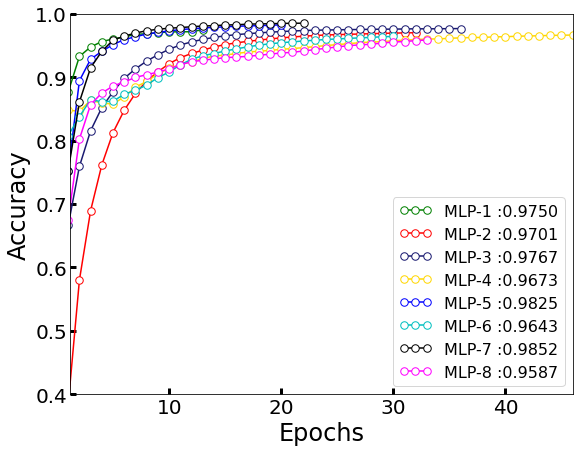

Loss Visualization


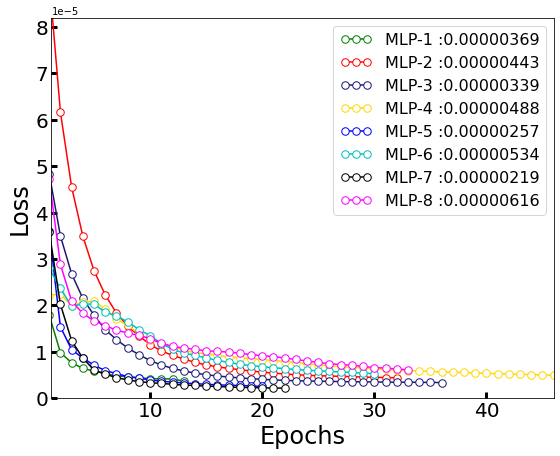

In [16]:
print('Accuracy Visualization')
plt.figure( figsize=(9,7))
plt.plot(LearningCurves[0][0].history['r_square'],'-o',markeredgecolor='g' ,color='g',markersize=7.5,
         markerfacecolor='w',label='MLP-1 :'+str(str(format(LearningCurves[0][0].history['r_square'][-1],'.4f'))))                             
plt.plot(LearningCurves[0][1].history['r_square'],'-o',markeredgecolor='r' ,color='r',markersize=7.5,
         markerfacecolor='w',label='MLP-2 :'+str(str(format(LearningCurves[0][1].history['r_square'][-1],'.4f'))))
plt.plot(LearningCurves[0][2].history['r_square'],'-o',markeredgecolor='midnightblue' ,color='midnightblue',markersize=7.5,
         markerfacecolor='w',label='MLP-3 :'+str(str(format(LearningCurves[0][2].history['r_square'][-1],'.4f'))))                            
plt.plot(LearningCurves[0][3].history['r_square'],'-o',markeredgecolor='gold' ,color='gold',markersize=7.5,
         markerfacecolor='w',label='MLP-4 :'+str(str(format(LearningCurves[0][3].history['r_square'][-1],'.4f'))))
plt.plot(LearningCurves[0][4].history['r_square'],'-o',markeredgecolor='b' ,color='b',markersize=7.5,
         markerfacecolor='w',label='MLP-5 :'+str(str(format(LearningCurves[0][4].history['r_square'][-1],'.4f'))))
plt.plot(LearningCurves[0][5].history['r_square'],'-o',markeredgecolor='c' ,color='c',markersize=7.5,
         markerfacecolor='w',label='MLP-6 :'+str(str(format(LearningCurves[0][5].history['r_square'][-1],'.4f'))))
plt.plot(LearningCurves[0][6].history['r_square'],'-o',markeredgecolor='k' ,color='k',markersize=7.5,
         markerfacecolor='w',label='MLP-7 :'+str(str(format(LearningCurves[0][6].history['r_square'][-1],'.4f'))))
plt.plot(LearningCurves[0][7].history['r_square'],'-o',markeredgecolor='magenta' ,color='magenta',markersize=7.5,
         markerfacecolor='w',label='MLP-8 :'+str(str(format(LearningCurves[0][7].history['r_square'][-1],'.4f'))))
plt.ylabel('Accuracy',fontsize=24)
plt.xlabel('Epochs',fontsize=24)
plt.legend( loc='best', numpoints=3,fontsize=16, ncol=1)
plt.tick_params(axis='y', direction='in',labelsize=20 ,width=3 ,length=6 ,labeltop=False ,labelbottom=True,
                top=False ,right=False)
plt.tick_params(axis='x', direction='in',labelsize=20 ,width=3 ,length=6 ,labeltop=False ,labelbottom=True,
                top=False ,right=False)
plt.xlim(1.2,46)
plt.ylim(0.4,1)
plt.show()
##########################################################################################################################
print('Loss Visualization')
plt.figure(figsize=(9,7))
plt.plot(LearningCurves[0][0].history['loss'],'-o',markeredgecolor='g' ,color='g',markersize=7.5,
         markerfacecolor='w',label='MLP-1 :'+str(str(format(LearningCurves[0][0].history['loss'][-1],'.8f'))))                             
plt.plot(LearningCurves[0][1].history['loss'],'-o',markeredgecolor='r' ,color='r',markersize=7.5,
         markerfacecolor='w',label='MLP-2 :'+str(str(format(LearningCurves[0][1].history['loss'][-1],'.8f'))))
plt.plot(LearningCurves[0][2].history['loss'],'-o',markeredgecolor='midnightblue' ,color='midnightblue',markersize=7.5,
         markerfacecolor='w',label='MLP-3 :'+str(str(format(LearningCurves[0][2].history['loss'][-1],'.8f'))))                            
plt.plot(LearningCurves[0][3].history['loss'],'-o',markeredgecolor='gold' ,color='gold',markersize=7.5,
         markerfacecolor='w',label='MLP-4 :'+str(str(format(LearningCurves[0][3].history['loss'][-1],'.8f'))))
plt.plot(LearningCurves[0][4].history['loss'],'-o',markeredgecolor='b' ,color='b',markersize=7.5,
         markerfacecolor='w',label='MLP-5 :'+str(str(format(LearningCurves[0][4].history['loss'][-1],'.8f'))))
plt.plot(LearningCurves[0][5].history['loss'],'-o',markeredgecolor='c' ,color='c',markersize=7.5,
         markerfacecolor='w',label='MLP-6 :'+str(str(format(LearningCurves[0][5].history['loss'][-1],'.8f'))))
plt.plot(LearningCurves[0][6].history['loss'],'-o',markeredgecolor='k' ,color='k',markersize=7.5,
         markerfacecolor='w',label='MLP-7 :'+str(str(format(LearningCurves[0][6].history['loss'][-1],'.8f'))))
plt.plot(LearningCurves[0][7].history['loss'],'-o',markeredgecolor='magenta' ,color='magenta',markersize=7.5,
         markerfacecolor='w',label='MLP-8 :'+str(str(format(LearningCurves[0][7].history['loss'][-1],'.8f'))))
plt.ylabel('Loss',fontsize=24)
plt.xlabel('Epochs',fontsize=24)
plt.legend( loc='best', numpoints=3,fontsize=16, ncol=1)
plt.tick_params(axis='y', direction='in',labelsize=20 ,width=3 ,length=6 ,labeltop=False ,labelbottom=True,
                top=False ,right=False)
plt.tick_params(axis='x', direction='in',labelsize=20 ,width=3 ,length=6 ,labeltop=False ,labelbottom=True,
                top=False ,right=False)
plt.xlim(1.2,46)
plt.ylim(0.0,0.000082)
plt.show()

Validation MAE Visualization


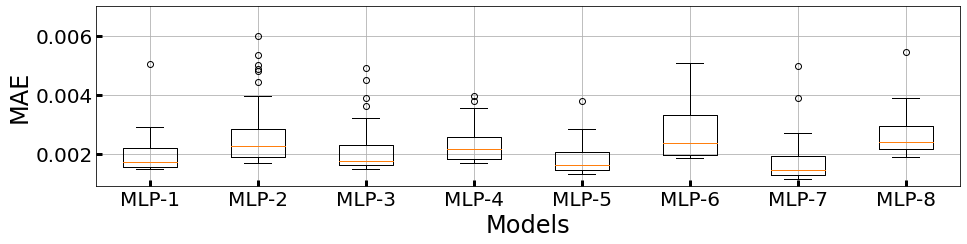

Validation RMSE Visualization


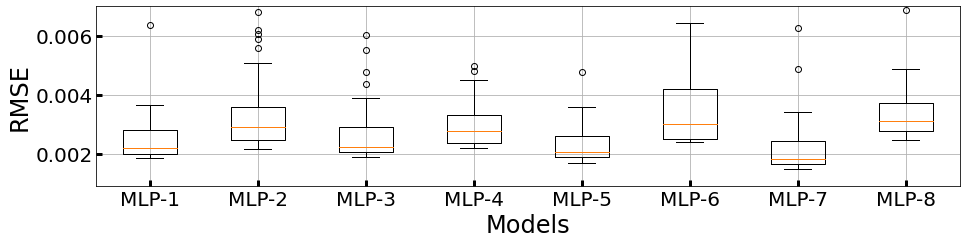

In [17]:
print('Validation MAE Visualization')
Names=['MLP-1','MLP-2','MLP-3','MLP-4','MLP-5','MLP-6','MLP-7','MLP-8']
################################################################################################################
fig = plt.figure(figsize =(12, 2.5))
data3= [LearningCurves[0][0].history['val_mae'], LearningCurves[0][1].history['val_mae'],
       LearningCurves[0][2].history['val_mae'], LearningCurves[0][3].history['val_mae'],
       LearningCurves[0][4].history['val_mae'], LearningCurves[0][5].history['val_mae'],
       LearningCurves[0][6].history['val_mae'], LearningCurves[0][7].history['val_mae']]
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data3,labels=Names)
plt.ylabel('MAE',fontsize=24)
plt.xlabel('Models',fontsize=24)
plt.tick_params(axis='both', direction='in',labelsize=20 ,width=3 ,length=6 ,labeltop=False ,labelbottom=True,
                top=False ,right=False)
plt.ylim(0.0009,0.007)
plt.grid()
plt.show()
################################################################################################################
print('Validation RMSE Visualization')
fig = plt.figure(figsize =(12, 2.5))
data = [LearningCurves[0][0].history['val_root_mean_squared_error'], LearningCurves[0][1].history['val_root_mean_squared_error'],
       LearningCurves[0][2].history['val_root_mean_squared_error'], LearningCurves[0][3].history['val_root_mean_squared_error'],
       LearningCurves[0][4].history['val_root_mean_squared_error'], LearningCurves[0][5].history['val_root_mean_squared_error'],
       LearningCurves[0][6].history['val_root_mean_squared_error'], LearningCurves[0][7].history['val_root_mean_squared_error']]
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data,labels=Names)
plt.ylabel('RMSE',fontsize=24)
plt.xlabel('Models',fontsize=24)
plt.tick_params(axis='both', direction='in',labelsize=20 ,width=3 ,length=6 ,labeltop=False ,labelbottom=True,
                top=False ,right=False)
plt.ylim(0.0009,0.007)
plt.grid()
plt.show()

## 1.Training, and Validating the Models
### 1.4 Save the Different Models

In [18]:
#ADAM_ReLuModel.save('Models/MLP-1.hdf5');RMSP_TanhModel.save('Models/MLP-2.hdf5');RMSP_ReLuModel.save('Models/MLP-3.hdf5')
#ADAM_TanhModel.save('Models/MLP-4.hdf5');NADAM_ReLuModel.save('Models/MLP-5.hdf5');
#NADAM_TanhModel.save('Models/MLP-6.hdf5')ADAMAX_ReLuModel.save('Models/MLP-7.hdf5');
#ADAMAX_TanhModel.save('Models/MLP-8.hdf5')

## 2. Testing the Pre-Trained Models
### 2.1 Importing the Different Models

In [19]:
ADAM_ReLuModel= load_model('Models/MLP-1.hdf5');RMSP_TanhModel= load_model('Models/MLP-2.hdf5');
RMSP_ReLuModel= load_model('Models/MLP-3.hdf5'); ADAM_TanhModel= load_model('Models/MLP-4.hdf5');
NADAM_ReLuModel= load_model('Models/MLP-5.hdf5');NADAM_TanhModel= load_model('Models/MLP-6.hdf5')
ADAMAX_ReLuModel= load_model('Models/MLP-7.hdf5');ADAMAX_TanhModel= load_model('Models/MLP-8.hdf5')

## 2. Testing the Pre-Trained Models
### 2.2 Ensemble Prosity Prediction 

In [20]:
TestResult = pd.DataFrame()
Realization=[]
AgvEnsResult=[]
WAgvEnsResult=[]
##########################################################################################################################
def WEn_realizationWEns():
    n_members = 8
    Models = [ADAMAX_ReLuModel,NADAM_ReLuModel,RMSP_ReLuModel,ADAM_ReLuModel,NADAM_TanhModel,
              ADAM_TanhModel,RMSP_TanhModel,ADAMAX_TanhModel]
    
    PorosityPred = [model.predict(X_test) for model in Models]
    PredPorosity =np.array(PorosityPred)
    Realization.append(PredPorosity)
##########################################################################################################################
    Weights = [1.0/n_members for _ in range(n_members)]
    AvgEnsPred = np.tensordot(PorosityPred, Weights, axes=((0),(0)))
    AgvEnsResult.append(AvgEnsPred)
##########################################################################################################################
    WeightAv= [0.25,0.2,0.15,0.13,0.09,0.08,0.05,0.05]
    WAvgEnsPred = np.tensordot(PredPorosity, WeightAv, axes=((0),(0)))
    WAgvEnsResult.append(WAvgEnsPred)
##########################################################################################################################
WEn_realizationWEns()
##########################################################################################################################
TestResult['MLP-1']=Realization[0][0].reshape(-1)
TestResult['MLP-2']=Realization[0][1].reshape(-1)
TestResult['MLP-3']=Realization[0][2].reshape(-1)
TestResult['MLP-4']=Realization[0][3].reshape(-1)
TestResult['MLP-5']=Realization[0][4].reshape(-1)
TestResult['MLP-6']=Realization[0][5].reshape(-1)
TestResult['MLP-7']=Realization[0][6].reshape(-1)
TestResult['MLP-8']=Realization[0][7].reshape(-1)
TestResult['StDev']=std(TestResult, axis=1)
TestResult['AvgEnModel']=AgvEnsResult[0].reshape(-1)
TestResult['WAvgEnModel']=WAgvEnsResult[0].reshape(-1)
TestResult['TruePorosity']=y_test.to_numpy().reshape(-1)
#TestResult.to_csv('TestResult.csv')
##########################################################################################################################
TestResult

704/704 [==============================] - 2s 2ms/step


MLP-1     MLP-2     MLP-3     MLP-4     MLP-5     MLP-6     MLP-7  \
0        0.319424  0.320504  0.320646  0.317823  0.313141  0.319182  0.317794   
1        0.315190  0.314033  0.314855  0.315214  0.310277  0.318748  0.316314   
2        0.310276  0.308935  0.308045  0.309692  0.306120  0.311274  0.310168   
3        0.303299  0.304092  0.302848  0.303537  0.298377  0.302734  0.301343   
4        0.303427  0.303106  0.301466  0.303352  0.298455  0.300762  0.299870   
...           ...       ...       ...       ...       ...       ...       ...   
1709995  0.279812  0.284398  0.281789  0.280304  0.283329  0.285884  0.278901   
1709996  0.285913  0.289402  0.287927  0.285523  0.290790  0.292831  0.285694   
1709997  0.290859  0.292436  0.292517  0.289636  0.297194  0.298457  0.293584   
1709998  0.291169  0.292786  0.291164  0.288478  0.296944  0.296405  0.295049   
1709999  0.285126  0.286969  0.286978  0.285695  0.288924  0.290656  0.290451   

            MLP-8     StDev  AvgEnModel  WAvgEnModel  TruePorosity  
0        0.320218  0.002305    0.318591     0.318988      0.320985  
1        0.316309  0.002256    0.315117     0.314866      0.315400  
2        0.309028  0.001482    0.309192     0.309235      0.310870  
3        0.299966  0.001850    0.302025     0.302668      0.303185  
4        0.299141  0.001838    0.301197     0.302006      0.302965  
...           ...       ...         ...          ...           ...  
1709995  0.283792  0.002305    0.282276     0.282046      0.280285  
1709996  0.289754  0.002504    0.288479     0.288036      0.285684  
1709997  0.296548  0.002963    0.293904     0.292863      0.290828  
1709998  0.293844  0.002712    0.293230     0.292408      0.290585  
1709999  0.286712  0.001952    0.287689     0.286976      0.284525  

[1710000 rows x 12 columns]

## 2. Testing the Pre-Trained Models
### 2.2 Compare the models

In [21]:
pd.set_option('precision', 5)
TestR = TestResult[['TruePorosity','MLP-1','MLP-2','MLP-3','MLP-4','MLP-5','MLP-6','MLP-7','MLP-8',
                    'AvgEnModel','WAvgEnModel']].corr(method='pearson')
#TestR.to_csv('TestR.csv')
print('Pearson Correlation Coeff.')
TestR

Pearson Correlation Coeff.


TruePorosity    MLP-1    MLP-2    MLP-3    MLP-4    MLP-5  \
TruePorosity       1.00000  0.99595  0.99518  0.99202  0.99315  0.99169   
MLP-1              0.99595  1.00000  0.99517  0.99250  0.99330  0.99271   
MLP-2              0.99518  0.99517  1.00000  0.99132  0.99300  0.99037   
MLP-3              0.99202  0.99250  0.99132  1.00000  0.98948  0.98807   
MLP-4              0.99315  0.99330  0.99300  0.98948  1.00000  0.98827   
MLP-5              0.99169  0.99271  0.99037  0.98807  0.98827  1.00000   
MLP-6              0.98862  0.98938  0.98743  0.98547  0.98696  0.99000   
MLP-7              0.98694  0.98670  0.98354  0.98285  0.98400  0.98706   
MLP-8              0.99056  0.99057  0.98934  0.98564  0.98952  0.99159   
AvgEnModel         0.99669  0.99748  0.99619  0.99433  0.99547  0.99593   
WAvgEnModel        0.99717  0.99843  0.99736  0.99521  0.99592  0.99507   

                MLP-6    MLP-7    MLP-8  AvgEnModel  WAvgEnModel  
TruePorosity  0.98862  0.98694  0.99056     0.99669      0.99717  
MLP-1         0.98938  0.98670  0.99057     0.99748      0.99843  
MLP-2         0.98743  0.98354  0.98934     0.99619      0.99736  
MLP-3         0.98547  0.98285  0.98564     0.99433      0.99521  
MLP-4         0.98696  0.98400  0.98952     0.99547      0.99592  
MLP-5         0.99000  0.98706  0.99159     0.99593      0.99507  
MLP-6         1.00000  0.98465  0.99077     0.99424      0.99282  
MLP-7         0.98465  1.00000  0.98496     0.99165      0.98958  
MLP-8         0.99077  0.98496  1.00000     0.99519      0.99373  
AvgEnModel    0.99424  0.99165  0.99519     1.00000      0.99970  
WAvgEnModel   0.99282  0.98958  0.99373     0.99970      1.00000

Visualization: True Porosity vs Tradditional Ensemble


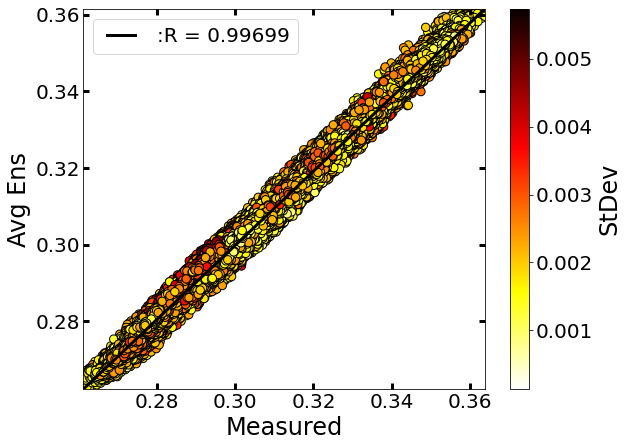

Visualization: True Porosity vs Proposed Ensemble


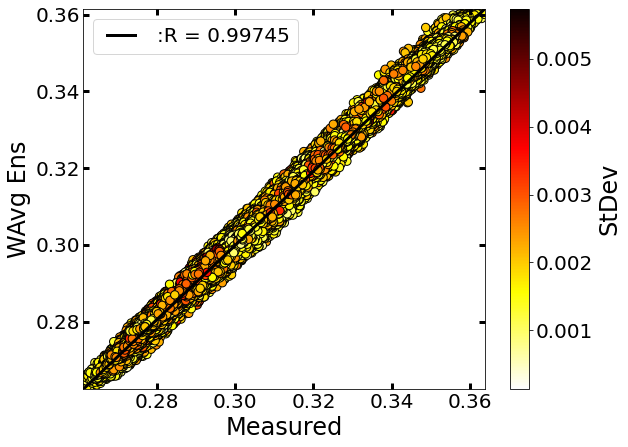

In [22]:
print('Visualization: True Porosity vs Tradditional Ensemble')
plt.figure( figsize=(9,7))
plt.scatter(TestResult['TruePorosity'],TestResult['AvgEnModel'],s=70,c=TestResult['StDev'],alpha=1,edgecolors='k',
            cmap='hot_r')
plt.plot([TestResult['TruePorosity'].min(), TestResult['TruePorosity'].max()],
         [TestResult['AvgEnModel'].min(), TestResult['AvgEnModel'].max()],
         linewidth=3 ,color='k', label=':R = 0.99699')
cbar = plt.colorbar()
cbar.set_label('StDev',fontsize=24)
cbar.ax.tick_params(labelsize=20)
plt.xlim(TestResult['TruePorosity'].min(), TestResult['TruePorosity'].max())
plt.ylim(TestResult['AvgEnModel'].min(), TestResult['AvgEnModel'].max())
plt.xlabel('Measured',fontsize=24)
plt.ylabel('Avg Ens',fontsize=24 )
plt.legend( loc='best', numpoints=2,fontsize=20)
plt.tick_params(axis='both', direction='in',labelsize=20,width=3,length=6,labeltop=False,labelbottom=True ,
                top=True,right=True)
plt.show()
###########################################################################################################################
print('Visualization: True Porosity vs Proposed Ensemble')
plt.figure( figsize=(9,7))
plt.scatter(TestResult['TruePorosity'],TestResult['WAvgEnModel'],s=70,c=TestResult['StDev'],alpha=1,edgecolors='k',
            cmap='hot_r')
plt.plot([TestResult['TruePorosity'].min(), TestResult['TruePorosity'].max()],
         [TestResult['WAvgEnModel'].min(), TestResult['WAvgEnModel'].max()],
         linewidth=3 ,color='k', label=':R = 0.99745')
cbar = plt.colorbar()
cbar.set_label('StDev',fontsize=24)
cbar.ax.tick_params(labelsize=20)
plt.xlim(TestResult['TruePorosity'].min(), TestResult['TruePorosity'].max())
plt.ylim(TestResult['WAvgEnModel'].min(), TestResult['WAvgEnModel'].max())
plt.xlabel('Measured',fontsize=24)
plt.ylabel('WAvg Ens',fontsize=24 )
plt.legend( loc='best', numpoints=2,fontsize=20)
plt.tick_params(axis='both', direction='in',labelsize=20,width=3,length=6,labeltop=False ,labelbottom=True ,
                top=True,right=True)
plt.show() 

Visualization: All Rializations vs True Porosity vs Tradditional Ensemble


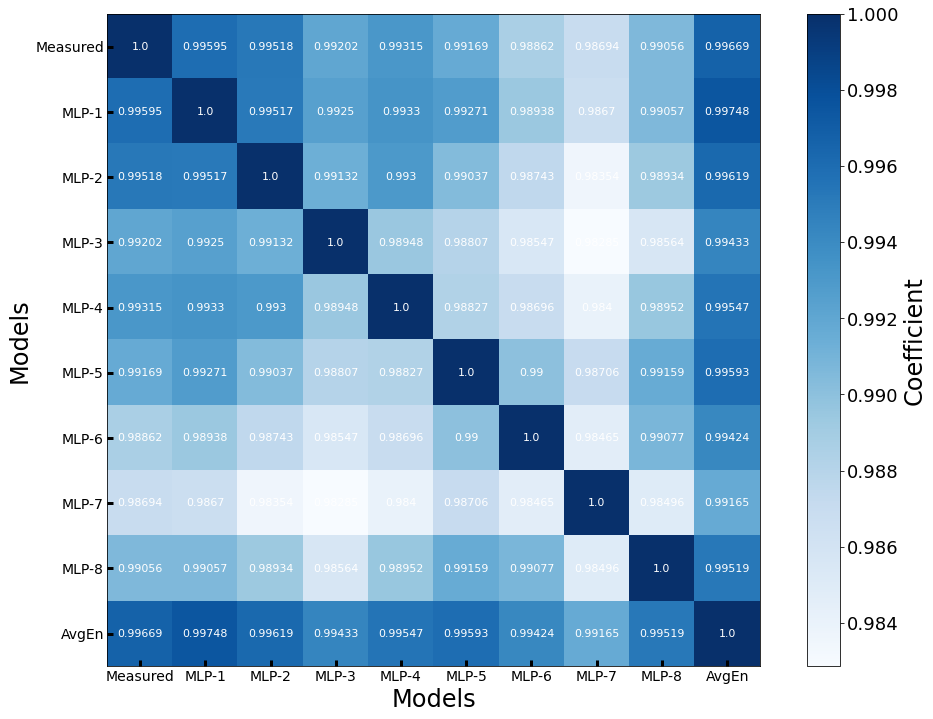

Visualization: All Realizations vs True Porosity vs Proposed Ensemble


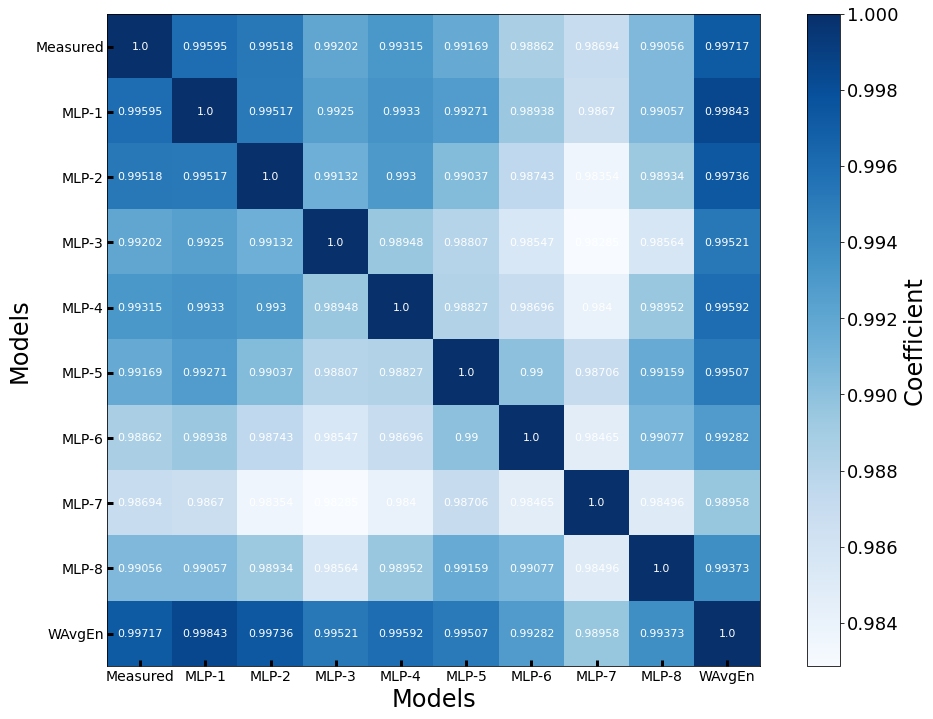

In [23]:
print('Visualization: All Rializations vs True Porosity vs Tradditional Ensemble')
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot(111)
TestR1 = TestResult[['TruePorosity','MLP-1','MLP-2','MLP-3','MLP-4','MLP-5',
                    'MLP-6','MLP-7','MLP-8','AvgEnModel']].corr(method='pearson')#.round(5)

Expnames =['Measured','MLP-1','MLP-2','MLP-3','MLP-4','MLP-5','MLP-6','MLP-7','MLP-8','AvgEn']
cax = ax.matshow(TestR1.to_numpy(),cmap='Blues')
cbar = fig.colorbar(cax)
cbar.set_label('Coefficient',fontsize=24)
cbar.ax.tick_params(labelsize=18)
ticks = np.arange(0,len(Expnames),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(Expnames)
ax.set_yticklabels(Expnames)
plt.setp(ax.get_xticklabels(), rotation=None)
for i in range(len(Expnames)):
    for j in range(len(Expnames)):
        tex = ax.text(j,i, np.round(TestR1.to_numpy()[i,j], decimals=5), 
                      ha='center', va='center', color='white', size=11)
plt.ylabel('Models',fontsize=24)
plt.xlabel('Models',fontsize=24)
plt.tick_params(axis='both', direction='in',labelsize=14 ,width=3 ,length=6 ,labeltop=False ,labelbottom=True,
                top=False ,right=False)
plt.show()
###########################################################################################################################
print('Visualization: All Realizations vs True Porosity vs Proposed Ensemble')
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot(111)
TestR2 = TestResult[['TruePorosity','MLP-1','MLP-2','MLP-3','MLP-4','MLP-5',
                    'MLP-6','MLP-7','MLP-8','WAvgEnModel']].corr(method='pearson')

Expnames =['Measured','MLP-1','MLP-2','MLP-3','MLP-4','MLP-5','MLP-6','MLP-7','MLP-8', 'WAvgEn']
cax = ax.matshow(TestR2.to_numpy(),cmap='Blues')
cbar = fig.colorbar(cax)
cbar.set_label('Coefficient',fontsize=24)
cbar.ax.tick_params(labelsize=18)
ticks = np.arange(0,len(Expnames),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(Expnames)
ax.set_yticklabels(Expnames)
plt.setp(ax.get_xticklabels(), rotation=None)
for i in range(len(Expnames)):
    for j in range(len(Expnames)):
        tex = ax.text(j,i, np.round(TestR2.to_numpy()[i,j], decimals=5), 
                      ha='center', va='center', color='white', size=11)
plt.ylabel('Models',fontsize=24)
plt.xlabel('Models',fontsize=24)
plt.tick_params(axis='both', direction='in',labelsize=14 ,width=3 ,length=6 ,labeltop=False ,labelbottom=True,
                top=False ,right=False)
plt.show()

## 2. Testing the Pre-Trained Models
### 2.3 Uncertainty Evaluation

In [24]:
TestRealization=TestResult[['MLP-1','MLP-2','MLP-3','MLP-4','MLP-5','MLP-6','MLP-7','MLP-8','StDev']]
TestUE=pd.DataFrame(TestRealization)
TestUE['UEv']=TestUE['StDev']/np.sqrt(8)
TestUE['WAvgEnsem']=TestResult['WAvgEnModel']
TestUE

MLP-1    MLP-2    MLP-3    MLP-4    MLP-5    MLP-6    MLP-7  \
0        0.31942  0.32050  0.32065  0.31782  0.31314  0.31918  0.31779   
1        0.31519  0.31403  0.31485  0.31521  0.31028  0.31875  0.31631   
2        0.31028  0.30893  0.30804  0.30969  0.30612  0.31127  0.31017   
3        0.30330  0.30409  0.30285  0.30354  0.29838  0.30273  0.30134   
4        0.30343  0.30311  0.30147  0.30335  0.29845  0.30076  0.29987   
...          ...      ...      ...      ...      ...      ...      ...   
1709995  0.27981  0.28440  0.28179  0.28030  0.28333  0.28588  0.27890   
1709996  0.28591  0.28940  0.28793  0.28552  0.29079  0.29283  0.28569   
1709997  0.29086  0.29244  0.29252  0.28964  0.29719  0.29846  0.29358   
1709998  0.29117  0.29279  0.29116  0.28848  0.29694  0.29640  0.29505   
1709999  0.28513  0.28697  0.28698  0.28569  0.28892  0.29066  0.29045   

           MLP-8    StDev      UEv  WAvgEnsem  
0        0.32022  0.00230  0.00081    0.31899  
1        0.31631  0.00226  0.00080    0.31487  
2        0.30903  0.00148  0.00052    0.30924  
3        0.29997  0.00185  0.00065    0.30267  
4        0.29914  0.00184  0.00065    0.30201  
...          ...      ...      ...        ...  
1709995  0.28379  0.00231  0.00082    0.28205  
1709996  0.28975  0.00250  0.00089    0.28804  
1709997  0.29655  0.00296  0.00105    0.29286  
1709998  0.29384  0.00271  0.00096    0.29241  
1709999  0.28671  0.00195  0.00069    0.28698  

[1710000 rows x 11 columns]

## 2. Testing the Pre-Trained Models
### 2.4 Mapping Testing Result

In [25]:
SeismicTrace = Seisdf.to_numpy().T
SeismicTrace=SeismicTrace.reshape(76,201,201)[14:54,51:,51:]
print('SeismicTrace shape is:',SeismicTrace.shape)
SeismCube = []
##########################################################################################################################
for image in range(SeismicTrace.shape[0]):
    input_img = SeismicTrace[image,:,:]    
    SeismCube.append(input_img)
SeismicTraceCube = np.array(SeismCube);print('SeismCube shape is:',SeismicTraceCube.shape)
##########################################################################################################################
PredEnsAvg = TestUE['WAvgEnsem'].to_numpy().reshape(22500,76).T
PredEnsAvg=PredEnsAvg.reshape(76,150,150)[14:54,:,:]
print('PredEnsAvg shape is:',PredEnsAvg.shape)
PredEnsAvgCube = []
##########################################################################################################################
for image in range(PredEnsAvg.shape[0]):
    input_img = PredEnsAvg[image,:,:]    
    PredEnsAvgCube.append(input_img)
PredPorosityCube = np.array(PredEnsAvgCube);print('PredPorosityCube shape is:',PredPorosityCube.shape)
##########################################################################################################################
PredEnsAvgUnc = TestUE['UEv'].to_numpy().reshape(22500,76).T
PredEnsAvgUnc=PredEnsAvgUnc.reshape(76,150,150)[14:54,:,:]
print('PredEnsAvgUnc shape is:',PredEnsAvgUnc.shape)
UncertaintyCube = []
##########################################################################################################################
for image in range(PredEnsAvgUnc.shape[0]):
    input_img = PredEnsAvgUnc[image,:,:]    
    UncertaintyCube.append(input_img)
PredUncertaintyCube = np.array(UncertaintyCube);print('PredUncertaintyCube shape is:',PredUncertaintyCube.shape)

SeismicTrace shape is: (40, 150, 150)
SeismCube shape is: (40, 150, 150)
PredEnsAvg shape is: (40, 150, 150)
PredPorosityCube shape is: (40, 150, 150)
PredEnsAvgUnc shape is: (40, 150, 150)
PredUncertaintyCube shape is: (40, 150, 150)


## 2. Testing the Pre-Trained Models
### 2.4 Visualizing Testing Result

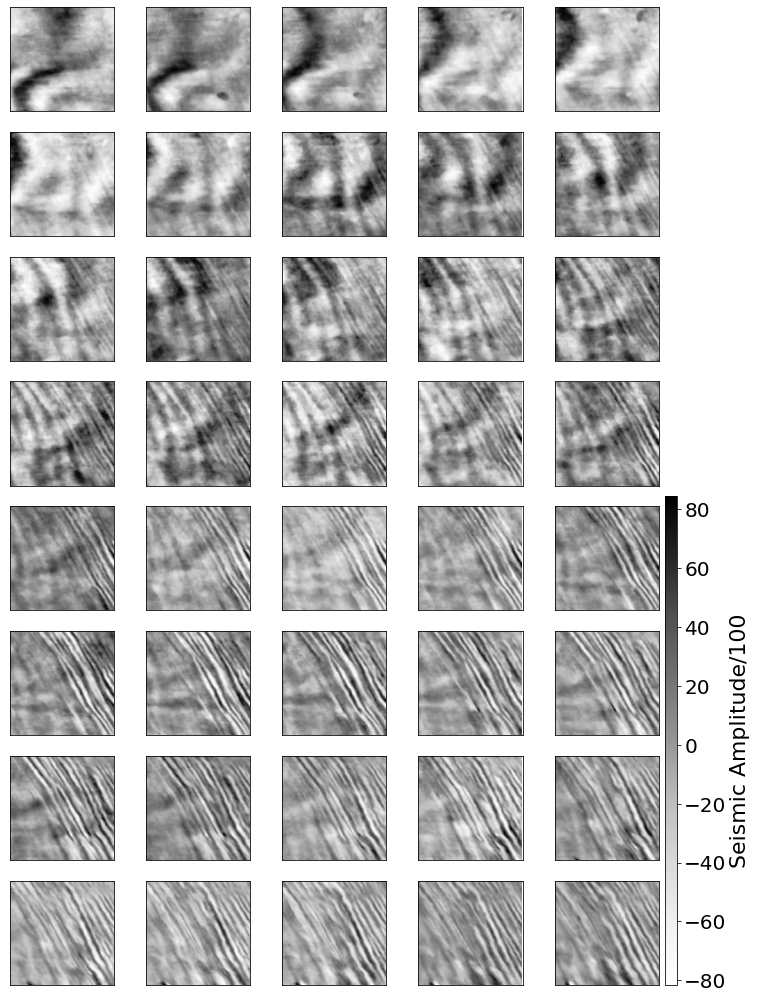

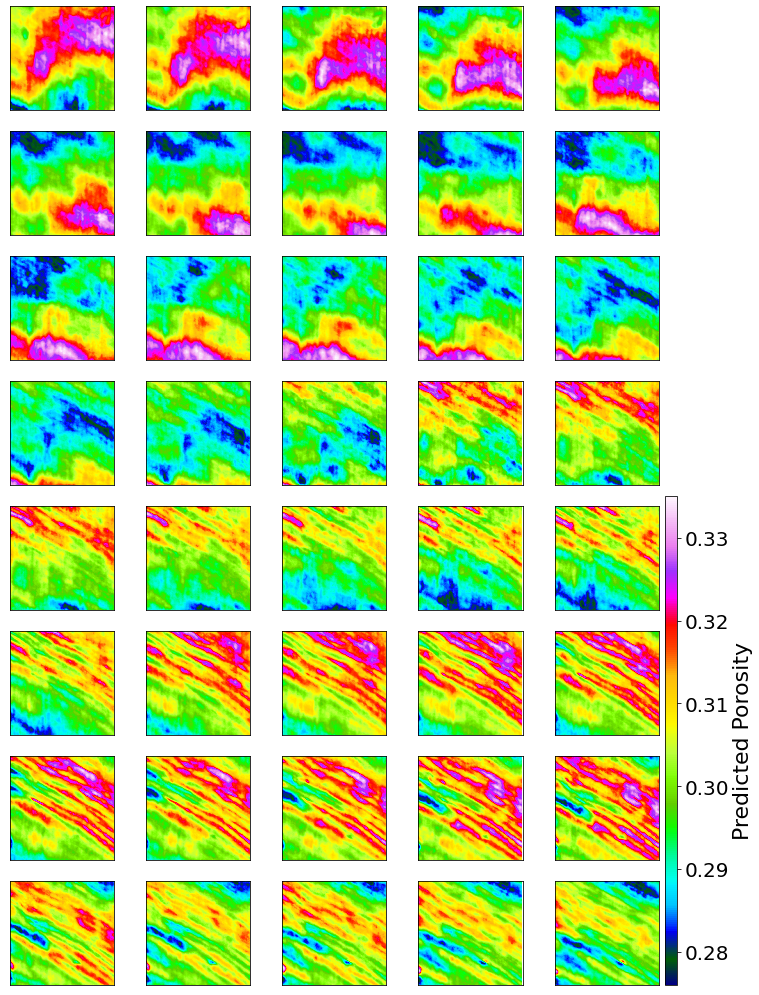

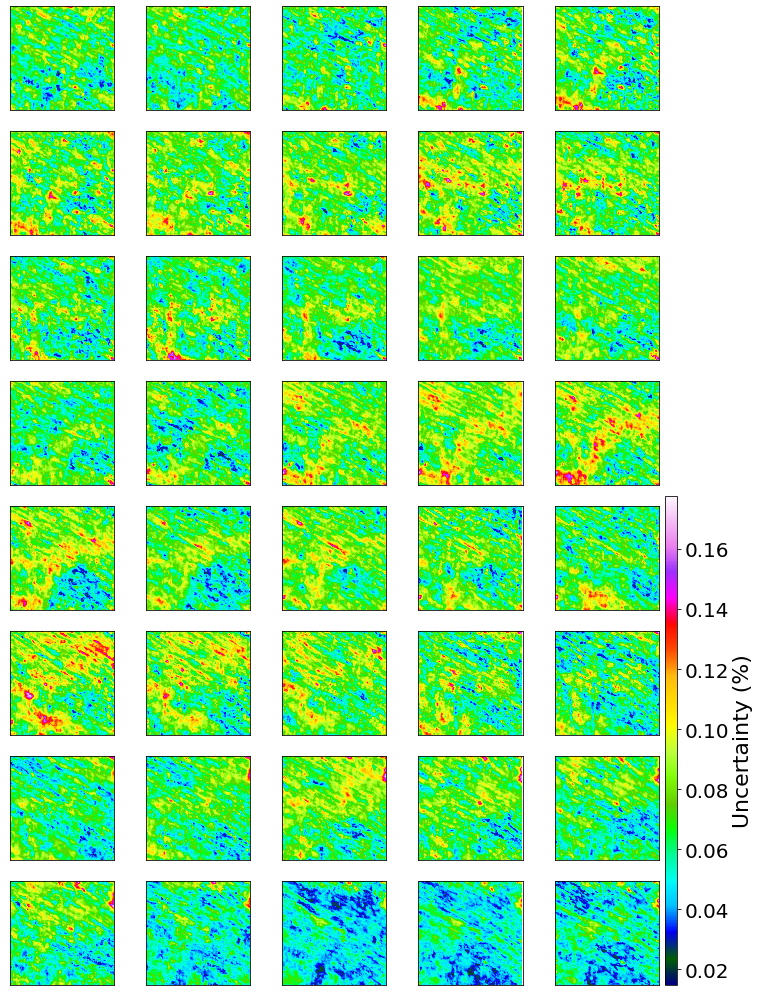

In [26]:
def DisplayPredSeismic(im3d, cmap="Greys", step=0):
    _, axes = plt.subplots(nrows=8, ncols=5, figsize=(14,18),subplot_kw={'xticks': [], 'yticks': []})
    for ax,image in zip(axes.flatten(),im3d[step::]):
        plt.sca(ax)
        plt.imshow(image, cmap=cmap)
        plt.xlim(0,150);plt.ylim(0,150)
        plt.tick_params(axis='both', direction='out',labelsize=16 ,width=2 ,length=3 ,labelbottom=True)
    cbar = plt.colorbar(ax=axes.ravel().tolist(), shrink=0.5, pad=0.008, 
                        orientation='vertical',aspect=40,anchor=(0.0, 0.0))
    cbar.set_label('Seismic Amplitude/100',fontsize=22)
    cbar.ax.tick_params(labelsize=20)   
    plt.show() 
DisplayPredSeismic(SeismicTraceCube/100)
###########################################################################################################################
def DisplayPredPorosity(im3d, cmap="gist_ncar", step=0):
    _, axes = plt.subplots(nrows=8, ncols=5, figsize=(14,18),subplot_kw={'xticks': [], 'yticks': []})
    for ax,image in zip(axes.flatten(),im3d[step::]):
        plt.sca(ax)
        plt.imshow(image, cmap=cmap)
        plt.xlim(0,150);plt.ylim(0,150)
        plt.tick_params(axis='both', direction='out',labelsize=16 ,width=2 ,length=3 ,labelbottom=True)
    cbar = plt.colorbar(ax=axes.ravel().tolist(), shrink=0.5, pad=0.008, 
                        orientation='vertical',aspect=40,anchor=(0.0, 0.0))
    cbar.set_label('Predicted Porosity',fontsize=22)
    cbar.ax.tick_params(labelsize=20)   
    plt.show() 
DisplayPredPorosity(PredPorosityCube)
###########################################################################################################################
def DisplayUncProfile(im3d, cmap="gist_ncar", step=0):
    _,axes = plt.subplots(nrows=8, ncols=5, figsize=(14,18),subplot_kw={'xticks': [], 'yticks': []})
    for ax, image in zip(axes.flatten(), im3d[step::]):
        plt.sca(ax)
        plt.imshow(image, cmap=cmap)
        plt.xlim(0,150);plt.ylim(0,150)
        plt.tick_params(axis='both', direction='out',labelsize=16 ,width=2 ,length=3 ,labelbottom=True)
        
    cbar = plt.colorbar(ax=axes.ravel().tolist(), shrink=0.5, pad=0.008, 
                        orientation='vertical',aspect=40,anchor=(0.0, 0.0))
    cbar.set_label('Uncertainty (%)',fontsize=22)
    cbar.ax.tick_params(labelsize=20)   
    plt.show() 
DisplayUncProfile(PredUncertaintyCube*100)

#                                                     The End!